In [127]:
import cv2
from numpy import array

def read_and_process_images(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread("data/" + str(image), cv2.IMREAD_GRAYSCALE), (50,50), interpolation = cv2.INTER_CUBIC))
        
        if 'apple' in str(image):
            y.append(0)
        
        if 'banana' in str(image):
            y.append(1)
    return array(X),array(y)

In [128]:
file_names=[]

In [129]:
import os
dirListing = os.listdir("data")
for filename in dirListing:
    file_names.append(str(filename))

In [130]:
len(file_names)

357

In [131]:
X, y = read_and_process_images(file_names)

In [120]:
cv2.imshow('ImageWindow', X[0])


In [135]:
X.shape

(357, 50, 50)

Training data shape (357, 50, 50, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 50, 50, 50)        1300      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 50)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 100)       125100    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 200)       500200    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 200)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 

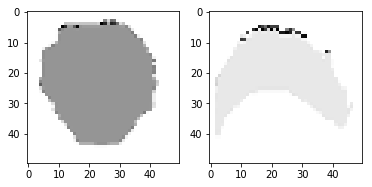

In [146]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets
import tensorflow as tf


X_train = X.reshape(X.shape[0], 50, 50,1)
y_train = tf.keras.utils.to_categorical(y, 2)
from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(50,50), cmap=plt.cm.Greys);
ax2.imshow(X_train[5].reshape(50,50), cmap=plt.cm.Greys);


# Build your DNN, an example model is given for you.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, (5,5), padding='same', activation='relu', input_shape=(50, 50,1)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(100, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(400, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(400, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [147]:
hist1 = model.fit(X_train, y_train,
          batch_size=5,
          epochs=10,
          verbose=1,
          validation_data=(X_train, y_train))

Train on 357 samples, validate on 357 samples
Epoch 1/10
357/357 [==============================] - 9s 25ms/sample - loss: 0.4753 - acc: 0.8599 - val_loss: 0.5746 - val_acc: 0.6975
Epoch 2/10
357/357 [==============================] - 8s 24ms/sample - loss: 0.0503 - acc: 0.9944 - val_loss: 2.1850e-05 - val_acc: 1.0000
Epoch 3/10
357/357 [==============================] - 8s 24ms/sample - loss: 1.7443e-05 - acc: 1.0000 - val_loss: 9.0273e-06 - val_acc: 1.0000
Epoch 4/10
357/357 [==============================] - 8s 23ms/sample - loss: 7.2660e-06 - acc: 1.0000 - val_loss: 4.8143e-06 - val_acc: 1.0000
Epoch 5/10
357/357 [==============================] - 8s 24ms/sample - loss: 4.2289e-06 - acc: 1.0000 - val_loss: 2.7939e-06 - val_acc: 1.0000
Epoch 6/10
357/357 [==============================] - 8s 23ms/sample - loss: 2.4526e-06 - acc: 1.0000 - val_loss: 1.8283e-06 - val_acc: 1.0000
Epoch 7/10
357/357 [==============================] - 8s 24ms/sample - loss: 1.7032e-06 - acc: 1.0000 - val_

In [149]:
predictions = model.predict(X.reshape(X.shape[0], 50, 50,1))

In [150]:
predictions

array([[1.00000000e+00, 2.71947904e-08],
       [1.00000000e+00, 3.51771732e-08],
       [3.28242034e-12, 1.00000000e+00],
       [9.21833543e-09, 1.00000000e+00],
       [1.07504513e-06, 9.99998927e-01],
       [2.07116598e-14, 1.00000000e+00],
       [4.98203290e-24, 1.00000000e+00],
       [1.00000000e+00, 4.30391793e-08],
       [1.70617795e-08, 1.00000000e+00],
       [1.00000000e+00, 4.04713809e-08],
       [3.13065574e-16, 1.00000000e+00],
       [9.99999881e-01, 8.51039559e-08],
       [1.00000000e+00, 1.90147400e-08],
       [4.60686437e-12, 1.00000000e+00],
       [9.18950055e-11, 1.00000000e+00],
       [1.01803954e-09, 1.00000000e+00],
       [1.00000000e+00, 1.77807067e-08],
       [4.94084161e-05, 9.99950647e-01],
       [1.49630823e-13, 1.00000000e+00],
       [1.00000000e+00, 1.50986672e-08],
       [1.00000000e+00, 2.02823980e-08],
       [1.00000000e+00, 1.63491407e-08],
       [1.00000000e+00, 1.38937413e-08],
       [1.00000000e+00, 3.67427226e-08],
       [1.000000

In [151]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train.argmax(axis=1), predictions.argmax(axis=1))


In [152]:
matrix

array([[200,   0],
       [  0, 157]])